In [119]:
# Import
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

import lazypredict
from lazypredict.Supervised import LazyClassifier

In [120]:
# import csv
df = pd.read_csv('Z0017_Tree.csv')

# Remove all rows without Vigor
df = df[df['Vigor'].notna()]
df.head()

# Drop useless columns
cols = [
    'PlotID', 'Year', 'Aspect', 'SeedCones',
    'CurrentConditionClass', 'OldTreeHistory',
    'HeightMethod', 'Notes'
    ]

df = df.drop(cols, axis=1)
df.head()


,SubplotID,TreeID,TreeStatus,DBH_Traditional,DBH_Modified,DBH_Dendroband,CrownClass,TotalLength,ActualLength,CrownBaseHeight,...,CrownDiameter1,CrownDiameter2,CauseofDamage1,CauseofDamage2,CauseofDamage3,TreeHeight,PreviousDBH,DiamChk,SpecialDamage2,SpecialDamage3
0,1,1,NaN,34.20,34.20,NaN,3.00,26.20,26.20,10.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,NaN,34.80,34.30,NaN,3.00,12.60,12.60,8.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,NaN,45.20,45.20,NaN,3.00,26.70,26.70,6.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,NaN,35.90,36.00,NaN,3.00,19.60,19.60,11.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,NaN,33.50,33.50,NaN,2.00,25.80,24.80,12.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
# One Hot Encode Columns
col = [
    'SubplotID', 'TreeID', 'TreeStatus',
    'Dieback', 'Transparency', 'Defoliation',
    'SpecialDamage1', 'SpecialDamage2', 'SpecialDamage3',
    'Discoloration', 'UncompactedCrownRatio', 'SaplingVigor',
    'LocationofDamage1', 'Damage1', 'SeverityofDamage1',
    'LocationofDamage2', 'Damage2', 'SeverityofDamage2',
    'LocationofDamage3', 'Damage3', 'SeverityofDamage3',
    'CauseofDeath', 'Counter', 'TreeOrientation',
    'LeanAngle', 'LengthMethod', 'pctRottenMissing',
    'DecayClass', 'CompactedCrownRatio', 'CrownExposure',
    'CrownLight', 'CrownPosition', 'TreeHistory',
    'CrownDensity1992', 'CrownDiameter1', 'CrownDiameter2',
    'CauseofDamage1', 'CauseofDamage2', 'CauseofDamage3',
    'DiamChk'
]

# One Hot Encode columns with ints and Nan into empty hot encode
df = pd.get_dummies(df, columns=col)
df.head()

,DBH_Traditional,DBH_Modified,DBH_Dendroband,CrownClass,TotalLength,ActualLength,CrownBaseHeight,Vigor,CrownDensity,TreeHeight,...,CrownDiameter1_0.0,CrownDiameter1_2.0,CrownDiameter1_4.0,CrownDiameter2_0.0,CrownDiameter2_2.0,CrownDiameter2_3.0,CauseofDamage1_0.0,CauseofDamage2_0.0,CauseofDamage3_0.0,DiamChk_0.0
0,34.20,34.20,NaN,3.00,26.20,26.20,10.40,1.00,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,34.80,34.30,NaN,3.00,12.60,12.60,8.90,2.00,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,45.20,45.20,NaN,3.00,26.70,26.70,6.00,1.00,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,35.90,36.00,NaN,3.00,19.60,19.60,11.90,1.00,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,33.50,33.50,NaN,2.00,25.80,24.80,12.60,1.00,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [123]:
# Convert Nan to mean
df = df.fillna(df.mean())
df['CrownDensity'].head()

0   52.50
1   52.50
2   52.50
3   52.50
4   52.50
Name: CrownDensity, dtype: float64

In [124]:
# Split data into train and test
X = df.drop('Vigor', axis=1)
y = df['Vigor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
X.head()

,DBH_Traditional,DBH_Modified,DBH_Dendroband,CrownClass,TotalLength,ActualLength,CrownBaseHeight,CrownDensity,TreeHeight,PreviousDBH,...,CrownDiameter1_0.0,CrownDiameter1_2.0,CrownDiameter1_4.0,CrownDiameter2_0.0,CrownDiameter2_2.0,CrownDiameter2_3.0,CauseofDamage1_0.0,CauseofDamage2_0.0,CauseofDamage3_0.0,DiamChk_0.0
0,34.20,34.20,0.50,3.00,26.20,26.20,10.40,52.50,0.00,7.36,...,0,0,0,0,0,0,0,0,0,0
1,34.80,34.30,0.50,3.00,12.60,12.60,8.90,52.50,0.00,7.36,...,0,0,0,0,0,0,0,0,0,0
2,45.20,45.20,0.50,3.00,26.70,26.70,6.00,52.50,0.00,7.36,...,0,0,0,0,0,0,0,0,0,0
3,35.90,36.00,0.50,3.00,19.60,19.60,11.90,52.50,0.00,7.36,...,0,0,0,0,0,0,0,0,0,0
4,33.50,33.50,0.50,2.00,25.80,24.80,12.60,52.50,0.00,7.36,...,0,0,0,0,0,0,0,0,0,0


In [127]:
y.head()

0   1.00
1   2.00
2   1.00
3   1.00
4   1.00
Name: Vigor, dtype: float64

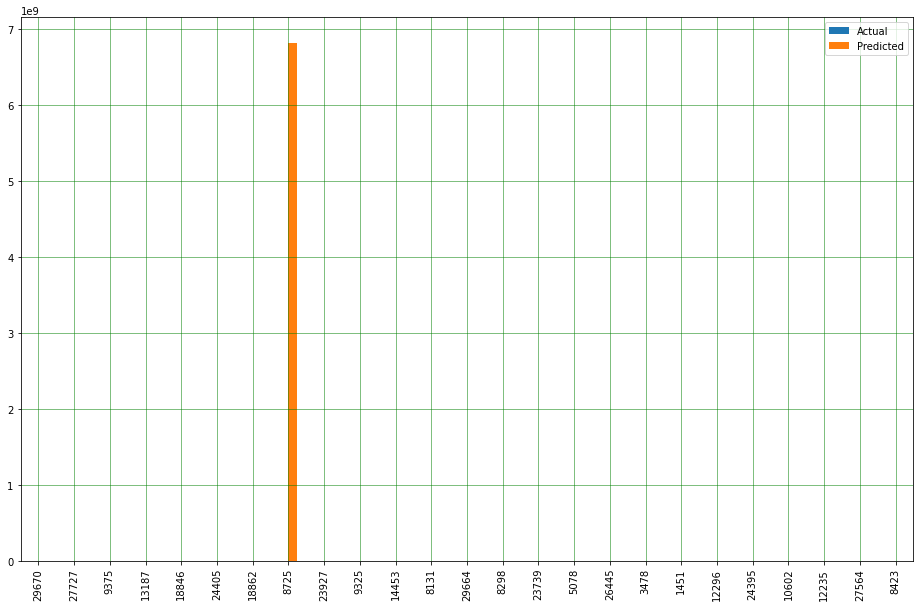

Mean Absolute Error: 50575854.23083389
Mean Squared Error: 1.3277266317071562e+18
Root Mean Squared Error: 1152270207.766892


In [125]:
# Train Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Test model
y_pred = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

# Plot
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Score
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [70]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:53<00:00,  1.86s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.79,0.55,None,0.79,1.02
LabelSpreading,0.75,0.53,None,0.75,11.58
LabelPropagation,0.75,0.53,None,0.75,7.72
SGDClassifier,0.77,0.53,None,0.75,0.24
SVC,0.79,0.53,None,0.77,3.59
BaggingClassifier,0.78,0.52,None,0.77,0.45
RandomForestClassifier,0.79,0.52,None,0.78,1.07
LinearDiscriminantAnalysis,0.75,0.52,None,0.73,0.11
ExtraTreesClassifier,0.78,0.51,None,0.77,0.97


Iteration 1, loss = 1.66789634
Iteration 2, loss = 0.60924482
Iteration 3, loss = 0.36641118
Iteration 4, loss = 0.30055512
Iteration 5, loss = 0.28411282
Iteration 6, loss = 0.26718155
Iteration 7, loss = 0.26490734
Iteration 8, loss = 0.26296999
Iteration 9, loss = 0.25686383
Iteration 10, loss = 0.25689089
Iteration 11, loss = 0.25551522
Iteration 12, loss = 0.25812917
Iteration 13, loss = 0.25354865
Iteration 14, loss = 0.24814784
Iteration 15, loss = 0.25399969
Iteration 16, loss = 0.25323966
Iteration 17, loss = 0.25379568
Iteration 18, loss = 0.25103610
Iteration 19, loss = 0.25037025
Iteration 20, loss = 0.24709748
Iteration 21, loss = 0.24396484
Iteration 22, loss = 0.24117883
Iteration 23, loss = 0.24310889
Iteration 24, loss = 0.24066863
Iteration 25, loss = 0.24335196
Iteration 26, loss = 0.24927707
Iteration 27, loss = 0.24035434
Iteration 28, loss = 0.24177856
Iteration 29, loss = 0.24487917
Iteration 30, loss = 0.24000968
Iteration 31, loss = 0.23659021
Iteration 32, los

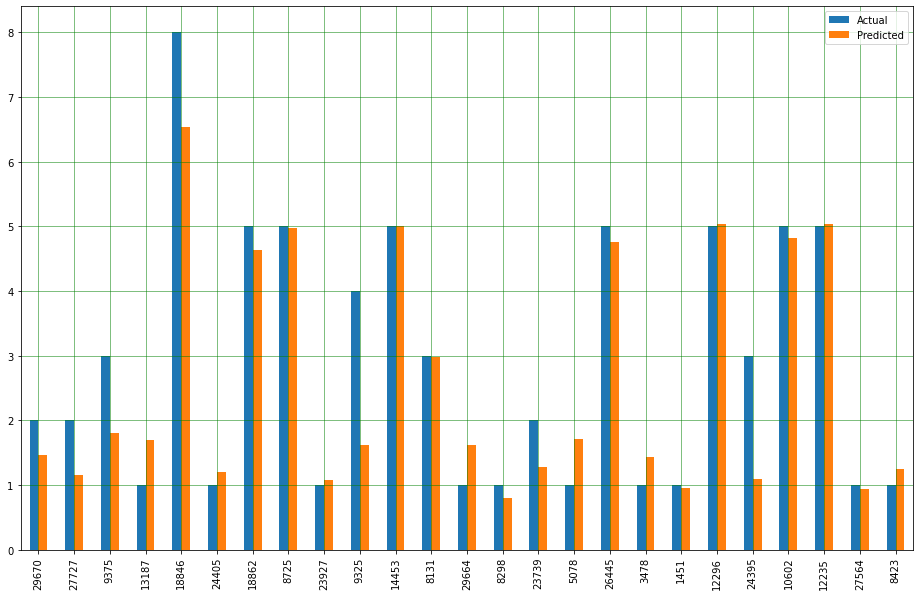

Mean Absolute Error: 0.4731663957954865
Mean Squared Error: 0.5133859933775642
Root Mean Squared Error: 0.7165095905691453


In [128]:
# Neural Network
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

# Train model
model = MLPRegressor(verbose=True)
model.fit(X_train, y_train)

# Test model
y_pred = model.predict(X_test)

# Cap values at 0 and 9 inclusive
y_pred = np.clip(y_pred, 0, 9)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

# Plot
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Score
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [130]:
y_pred.min()

0.3376815372716737